# Impact of central bank interest rate decisions on inflation rates and markets
Project by: *Timo Gumpp*
Course: *Machine Learning for Portfolio Trading*
University: *ENSAE Paris*

### Objective of this project

1. Observe how accompanying press statements regarding decisions of interest rate changes differ (length, sentiment, sophistication, etc.)
2. Observe correlation of different press releases characteristics on the result of the interest change hike
3. Observe impact of characteristics of interest rate announcements (length, sentiment, sophistication, etc.) on inflation development
4. (Optionally, out of interest): Observe potential impact of characteristics of interest rate announcements (length, sentiment, sophistication, etc.) on capital markets (e.g., using the example of S&P 500 index)


### Running **ToDos** of the project:
- Add ECB web scraping
- Add further sentiment analysis models
- Add text analysis (ngrams, etc.)
- Use Vectorizing (e.g., TFIDF, etc.)
- Add interest rate hikes
- Generally add comparisons between EU and US

### Loading Packages

In [127]:
import pandas as pd
import matplotlib
import nltk
#import spacy
from IPython.display import IFrame
import os
from bs4 import BeautifulSoup
import requests
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### Load in text

#### What to look at

I limit the project on the ECB and the FED, thus looking into inflation in the Eurozone and the US respectively.

***
- The ECB's council takes interest rate decisions x times a year and each time releases press statements.
- The Federal Open Market Commitee (FOMC – the FED's council on moneytary policy decisions) holds regularly scheduled meetings 8 times a year and other meetings as needed. Each time a press statement is released. Every second meeting, this seems to be accompanied by a summary of economic projections.

The released statements include xx

An **example for a press statement** from both the ECB and the FED can be viewed here and accessed under the these links: __[ECB_Dec23](https://www.ecb.europa.eu/press/pressconf/shared/pdf/ecb.ds231214~cbcff0882a.en.pdf)__ or __[FOMC_Dec23](https://www.federalreserve.gov/monetarypolicy/files/monetary20231213a1.pdf)__

In [8]:
os.getcwd()

'/Users/tgumpp/DataspellProjects/ICBIRDIRM'

In [12]:
filepath_exp_ecb = "./Documents/ECB/ecb231214.pdf"

In [13]:
IFrame(filepath_exp_ecb, width=600, height=300)

We primarily focus on the developments from 2022 to 2023, and will potentally look into developments in 2020 and 2021. The year 2024 is left out of our analysis.
The also release minutes, which we're not using in our analysis

The FOMC's press releases compose themselves of a press statement and an implementation note, highlighting which monetary measures are being taken.

In [7]:
from nltk import FreqDist
from nltk.tokenize import word_tokenize

# Download NLTK resources (you need to do this once)
nltk.download('punkt')

# Tokenize the text
tokens = word_tokenize(text_test)

# Calculate word frequencies
word_freq = FreqDist(tokens)

# Display the most common words
print(word_freq.most_common(10))

[nltk_data] Downloading package punkt to /Users/tgumpp/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('the', 21), ('.', 16), ('and', 15), (',', 13), ('of', 12), ('to', 12), ('Committee', 11), ('The', 8), ('inflation', 8), ('policy', 6)]


#### Web Mining FOMC

Extraction of text is automated, the supply of the corresponding URLs not for now

In [57]:
fomc_statements_url_list = ['https://www.federalreserve.gov/newsevents/pressreleases/monetary20230201a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20230322a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20230503a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20230614a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20230726a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20230920a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20231101a.htm',
                            'https://www.federalreserve.gov/newsevents/pressreleases/monetary20231213a.htm']

In [9]:
# To automate: Cycle through URLs here
url = "https://www.federalreserve.gov/newsevents/pressreleases/monetary20231101a.htm"
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

In [55]:
target_text = soup.find('div', class_='col-xs-12 col-sm-8 col-md-8')
target_date = soup.find('p', class_='article__time')
target_url = soup.find('meta', property='og:url').get('content')

In [213]:
# TODO: add if / else if mining fails
def process_text(text):
    list = [title.text.strip() for title in text]
    text_final = ' '.join(map(str, list))
    return text_final

def process_date(date):
    raw_date = date.get_text(strip=True)
    #print("Raw Date:", raw_date)

    # Transform the date format
    datetime_object = datetime.strptime(raw_date, '%B %d, %Y')
    formatted_date = datetime_object.strftime('%d.%m.%Y')
    return pd.to_datetime(formatted_date, format='%d.%m.%Y')

def process_url(url):
    return url.split('/')[-1].split('.')[0]

In [246]:
df_fomc_press_statements = pd.DataFrame(columns = {"Filename", "Date", "Text"})

for x in fomc_statements_url_list:
    page = requests.get(x)
    soup = BeautifulSoup(page.text, 'html')

    target_text = soup.find('div', class_='col-xs-12 col-sm-8 col-md-8')
    target_date = soup.find('p', class_='article__time')
    target_url = soup.find('meta', property='og:url').get('content')

    # run processing and add processed to df
    df_fomc_press_statements = df_fomc_press_statements.append({'Filename': process_url(target_url), 'Date': process_date(target_date), 'Text': process_text(target_text)}, ignore_index=True)

/var/folders/n_/mj2qn5sd20lb04k5gcvn8fbr0000gn/T/ipykernel_2950/3620499659.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fomc_press_statements = df_fomc_press_statements.append({'Filename': process_url(target_url), 'Date': process_date(target_date), 'Text': process_text(target_text)}, ignore_index=True)
/var/folders/n_/mj2qn5sd20lb04k5gcvn8fbr0000gn/T/ipykernel_2950/3620499659.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fomc_press_statements = df_fomc_press_statements.append({'Filename': process_url(target_url), 'Date': process_date(target_date), 'Text': process_text(target_text)}, ignore_index=True)
/var/folders/n_/mj2qn5sd20lb04k5gcvn8fbr0000gn/T/ipykernel_2950/3620499659.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

In [247]:
#df_fomc_press_statements['Date'] = pd.to_datetime(df_fomc_press_statements['Date'], format='%d.%m.%Y')
df_fomc_press_statements

,Date,Text,Filename
0,2023-02-01 00:00:00,Recent indicators point to modest growth in s...,monetary20230201a
1,2023-03-22 00:00:00,Recent indicators point to modest growth in s...,monetary20230322a
2,2023-05-03 00:00:00,Economic activity expanded at a modest pace i...,monetary20230503a
3,2023-06-14 00:00:00,Recent indicators suggest that economic activ...,monetary20230614a
4,2023-07-26 00:00:00,Recent indicators suggest that economic activ...,monetary20230726a
5,2023-09-20 00:00:00,Recent indicators suggest that economic activ...,monetary20230920a
6,2023-11-01 00:00:00,Recent indicators suggest that economic activ...,monetary20231101a
7,2023-12-13 00:00:00,Recent indicators suggest that growth of econ...,monetary20231213a


### Load inflation data

#### US inflation data

In [89]:
url_us_inf = "https://www.usinflationcalculator.com/inflation/current-inflation-rates/"
page_us_inf = requests.get(url_us_inf)
response = requests.get(url_us_inf)

# Parse HTML with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table
table = soup.find('table')

# Extract table data
data = []
for row in table.find_all('tr'):
    row_data = [cell.get_text(strip=True) for cell in row.find_all(['td', 'th'])]
    data.append(row_data)

# Create a DataFrame
df = pd.DataFrame(data[1:], columns=data[0])
df_us_inf = df

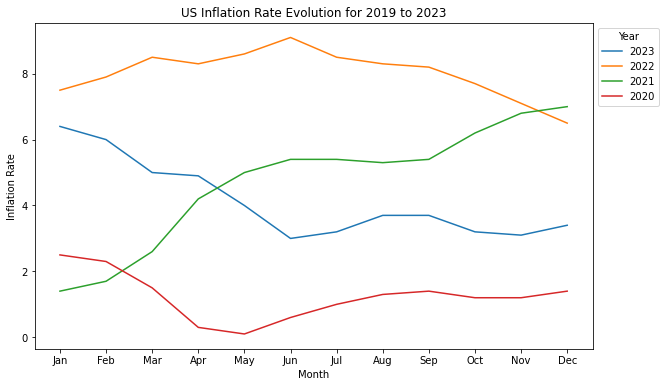

In [112]:
import matplotlib.pyplot as plt

# Extract relevant columns for plotting
months = df_us_inf.columns[1:-1]  # Exclude the 'Year' and 'Ave' columns
years = df_us_inf['Year'].head(4)
inflation_data = df_us_inf.iloc[:5, 1:-1].astype(float)  # Exclude the 'Year' and 'Ave' columns

# Plot the evolution of inflation rates
plt.figure(figsize=(10, 6))

for year in years:
    plt.plot(months, inflation_data.loc[df_us_inf['Year'] == year].values.flatten(), label=str(year))

plt.title('US Inflation Rate Evolution for 2019 to 2023')
plt.xlabel('Month')
plt.ylabel('Inflation Rate')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

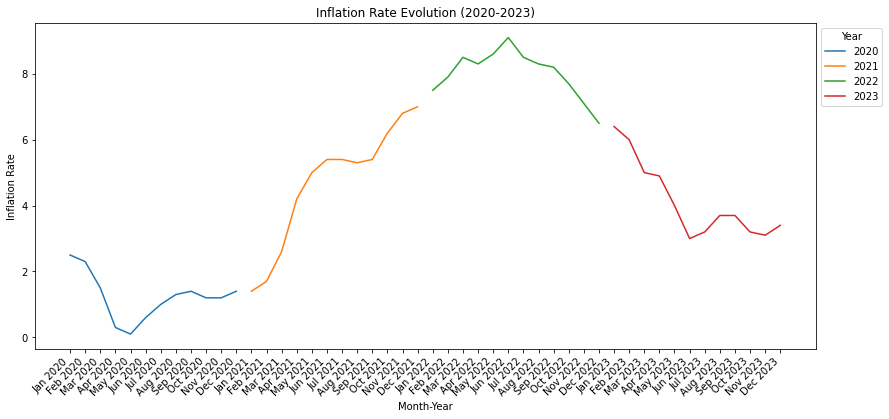

In [228]:
# Convert 'Year' column to integer
df_us_inf['Year'] = df_us_inf['Year'].astype(int)

# Remove Avg
df_us_inf = df_us_inf.drop('Ave', axis = 1)

# Reshape the DataFrame to a longer format
df_long = pd.melt(df_us_inf, id_vars='Year', var_name='Month', value_name='Inflation Rate')

# Filter data for the last 4 years (2020 to 2023)
df_long_last_4_years = df_long[df_long['Year'].between(2020, 2023)]

# Plot the evolution of inflation rates for the last 4 years
plt.figure(figsize=(14, 6))  # Adjust the figure size for better visibility

for year in sorted(df_long_last_4_years['Year'].unique(), reverse=False):
    df_subset = df_long_last_4_years[df_long_last_4_years['Year'] == year]
    plt.plot(df_subset['Month'] + ' ' + df_subset['Year'].astype(str), df_subset['Inflation Rate'].astype(float), label=str(year))

plt.title('Inflation Rate Evolution (2020-2023)')
plt.xlabel('Month-Year')
plt.ylabel('Inflation Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

#### EU inflation data

### Load market data

#### S&P 500 ETF

In [130]:
import yfinance as yf

sp500 = yf.Ticker("IVV")

sp500.info

{'phone': '1-800-474-2737',
 'longBusinessSummary': 'The index measures the performance of the large-capitalization sector of the U.S. equity market, as determined by SPDJI. The fund generally will invest at least 80% of its assets in the component securities of its index and in investments that have economic characteristics that are substantially identical to the component securities of its index and may invest up to 20% of its assets in certain futures, options and swap contracts, cash and cash equivalents.',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 490.33,
 'open': 489.92,
 'dayLow': 488.9,
 'dayHigh': 491.44,
 'regularMarketPreviousClose': 490.33,
 'regularMarketOpen': 489.92,
 'regularMarketDayLow': 488.9,
 'regularMarketDayHigh': 491.44,
 'trailingPE': 24.572989,
 'volume': 4097585,
 'regularMarketVolume': 4097585,
 'averageVolume': 5167219,
 'averageVolume10days': 5661910,
 'averageDailyVolume10Day': 5661910,
 'bid': 486.14,
 'ask': 489.82,
 'bidSize': 800,
 'askSize

In [131]:
# get historical market data
sp500.history(period="1mo")

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2023-12-27 00:00:00-05:00,477.779999,478.899994,477.160004,478.779999,3761000,0.0,0.0,0.0
2023-12-28 00:00:00-05:00,479.149994,479.790009,478.519989,479.000000,3429500,0.0,0.0,0.0
2023-12-29 00:00:00-05:00,478.730011,479.260010,475.540009,477.630005,3989700,0.0,0.0,0.0
2024-01-02 00:00:00-05:00,474.399994,475.880005,472.700012,474.890015,5185100,0.0,0.0,0.0
2024-01-03 00:00:00-05:00,472.660004,473.410004,470.380005,471.010010,5996000,0.0,0.0,0.0
2024-01-04 00:00:00-05:00,470.510010,473.190002,469.269989,469.559998,6198300,0.0,0.0,0.0
2024-01-05 00:00:00-05:00,469.700012,472.660004,468.649994,470.119995,10429100,0.0,0.0,0.0
2024-01-08 00:00:00-05:00,470.619995,476.980011,470.549988,476.589996,8460200,0.0,0.0,0.0
2024-01-09 00:00:00-05:00,474.179993,477.170013,473.600006,476.140015,5361200,0.0,0.0,0.0


[*********************100%%**********************]  1 of 1 completed


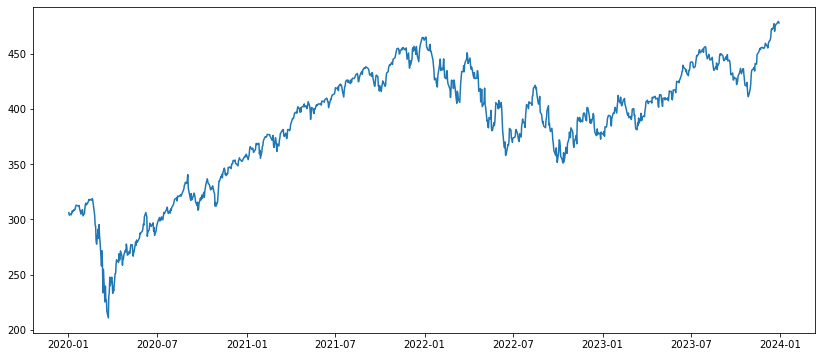

In [139]:
from datetime import date, timedelta

Start = date(2020, 1, 1)
Start.strftime('%Y-%m-%d')

End = date(2023, 12, 31)
End.strftime('%Y-%m-%d')

def closing_price(ticker):
    Asset = pd.DataFrame(yf.download(ticker, start=Start,
                                     end=End)['Adj Close'])
    return Asset

SP500 = closing_price('IVV')

plt.figure(figsize=(14, 6))
plt.plot(SP500)
plt.show()

https://aroussi.com/post/python-yahoo-finance
python y finance

### Processing text

Preprocessing text, these are typical steps to pursue to prepare a meaningful dataset for text.

- Lemmanization
- Stemming
- Removal of Stopwords
-

### First text analysis

In [248]:
def get_word_count(text):
    word_count = len(text.split())
    #print(f"Word Count: {word_count}")
    return word_count

def get_char_count(text):
    char_count = len(text)
    # print(f"Character Count: {char_count}")
    return char_count

In [249]:
df_fomc_press_statements = df_fomc_press_statements.assign(WordCount='', CharCount='')

In [236]:
for index, row in df_fomc_press_statements.iterrows():
    print("Index:\t ", index)
    print('Row:\t', row)

Index:	  0
Row:	 Filename                                     monetary20230201a
Date                                       2023-02-01 00:00:00
Text          Recent indicators point to modest growth in s...
WordCount                                                     
CharCount                                                     
Name: 0, dtype: object
Index:	  1
Row:	 Filename                                     monetary20230322a
Date                                       2023-03-22 00:00:00
Text          Recent indicators point to modest growth in s...
WordCount                                                     
CharCount                                                     
Name: 1, dtype: object
Index:	  2
Row:	 Filename                                     monetary20230503a
Date                                       2023-05-03 00:00:00
Text          Economic activity expanded at a modest pace i...
WordCount                                                     
CharCount            

In [253]:
for index, row in df_fomc_press_statements.iterrows():
    #text = row['Text'].astype(str)
    print(type(row['Text']))
    df_fomc_press_statements.at[index, 'WordCount'] = get_word_count(row['Text'])
    df_fomc_press_statements.at[index, 'CharCount'] = get_char_count(row['Text'])

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [254]:
df_fomc_press_statements

,Date,Text,Filename,WordCount,CharCount
0,2023-02-01 00:00:00,Recent indicators point to modest growth in s...,monetary20230201a,349,2339
1,2023-03-22 00:00:00,Recent indicators point to modest growth in s...,monetary20230322a,381,2541
2,2023-05-03 00:00:00,Economic activity expanded at a modest pace i...,monetary20230503a,347,2328
3,2023-06-14 00:00:00,Recent indicators suggest that economic activ...,monetary20230614a,357,2396
4,2023-07-26 00:00:00,Recent indicators suggest that economic activ...,monetary20230726a,349,2353
5,2023-09-20 00:00:00,Recent indicators suggest that economic activ...,monetary20230920a,354,2390
6,2023-11-01 00:00:00,Recent indicators suggest that economic activ...,monetary20231101a,360,2426
7,2023-12-13 00:00:00,Recent indicators suggest that growth of econ...,monetary20231213a,371,2480


### Sentiment Analysis

In [68]:
from tqdm.notebook import tqdm
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [116]:
df

for x in df_fomc_press_statements['Text']:
    #print(type(x))
    #print(type(sia.polarity_scores(x)))
    print(sia.polarity_scores(x))

{'neg': 0.078, 'neu': 0.846, 'pos': 0.076, 'compound': -0.5994}
{'neg': 0.047, 'neu': 0.885, 'pos': 0.068, 'compound': 0.765}
{'neg': 0.051, 'neu': 0.881, 'pos': 0.068, 'compound': 0.6124}
{'neg': 0.05, 'neu': 0.879, 'pos': 0.072, 'compound': 0.743}
{'neg': 0.051, 'neu': 0.882, 'pos': 0.067, 'compound': 0.6124}
{'neg': 0.062, 'neu': 0.853, 'pos': 0.085, 'compound': 0.775}
{'neg': 0.061, 'neu': 0.853, 'pos': 0.086, 'compound': 0.8225}
{'neg': 0.059, 'neu': 0.847, 'pos': 0.094, 'compound': 0.9042}


AttributeError: 'float' object has no attribute 'encode'

In [117]:
# Create columns for sentiment scores
df_fomc_press_statements['compound'] = 0.0
df_fomc_press_statements['neg'] = 0.0
df_fomc_press_statements['neu'] = 0.0
df_fomc_press_statements['pos'] = 0.0

# Iterate through rows and calculate sentiment scores
for index, row in df_fomc_press_statements.iterrows():
    text = row['Text']
    scores = sia.polarity_scores(text)

    # Update the corresponding row with sentiment scores
    df_fomc_press_statements.at[index, 'compound'] = scores['compound']
    df_fomc_press_statements.at[index, 'neg'] = scores['neg']
    df_fomc_press_statements.at[index, 'neu'] = scores['neu']
    df_fomc_press_statements.at[index, 'pos'] = scores['pos']

AttributeError: 'float' object has no attribute 'encode'

In [122]:
df_fomc_press_statements = df_fomc_press_statements.head(8)
df_fomc_press_statements

,Date,Text,Filename,CharCount,WordCount,compound
0,01.02.2023,Recent indicators point to modest growth in s...,monetary20230201a,NaN,NaN,-0.5994
1,22.03.2023,Recent indicators point to modest growth in s...,monetary20230322a,NaN,NaN,0.7650
2,03.05.2023,Economic activity expanded at a modest pace i...,monetary20230503a,NaN,NaN,0.6124
3,14.06.2023,Recent indicators suggest that economic activ...,monetary20230614a,NaN,NaN,0.7430
4,26.07.2023,Recent indicators suggest that economic activ...,monetary20230726a,NaN,NaN,0.6124
5,20.09.2023,Recent indicators suggest that economic activ...,monetary20230920a,NaN,NaN,0.7750
6,01.11.2023,Recent indicators suggest that economic activ...,monetary20231101a,NaN,NaN,0.8225
7,13.12.2023,Recent indicators suggest that growth of econ...,monetary20231213a,NaN,NaN,0.9042


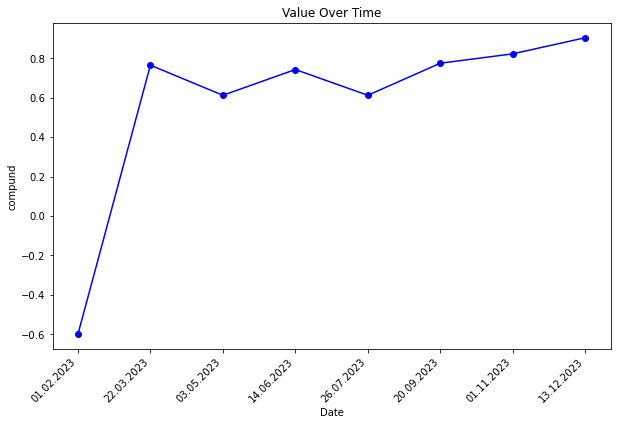

In [123]:
plt.figure(figsize=(10, 6))
plt.plot(df_fomc_press_statements['Date'], df_fomc_press_statements['compound'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.title('Value Over Time')
plt.xlabel('Date')
plt.ylabel('compund')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

#### Roberta
ToDo: Add additional models for sentiment analyis (Roberta, Loughran-McDonald Master Dictionary w/ Sentiment Word Lists) https://sraf.nd.edu/loughranmcdonald-master-dictionary/

In [91]:
# ToDo: Add additional models for sentiment analyis

### Comparing sentiment analysis with inflation rate development

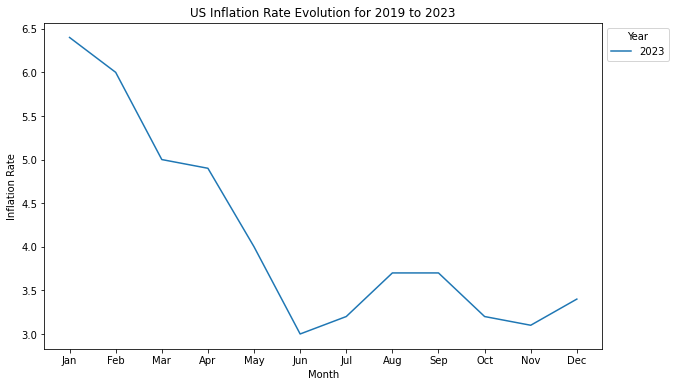

In [125]:
import matplotlib.pyplot as plt

# Extract relevant columns for plotting
months = df_us_inf.columns[1:-1]  # Exclude the 'Year' and 'Ave' columns
years = df_us_inf['Year'].head(1)
inflation_data = df_us_inf.iloc[:5, 1:-1].astype(float)  # Exclude the 'Year' and 'Ave' columns

# Plot the evolution of inflation rates
plt.figure(figsize=(10, 6))

for year in years:
    plt.plot(months, inflation_data.loc[df_us_inf['Year'] == year].values.flatten(), label=str(year))

plt.title('US Inflation Rate Evolution for 2019 to 2023')
plt.xlabel('Month')
plt.ylabel('Inflation Rate')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

Transform dataframe into a series with dates. We use the 15th of each month.

In [185]:
# Transpose df and add dates to it to prepare the plotting
df_us_inf_transposed = df_us_inf.transpose()
df_us_inf_transposed.drop(df_us_inf_transposed.tail(1).index,inplace=True) # drop last n rows
new_header = df_us_inf_transposed.iloc[0] #grab the first row for the header
df_us_inf_transposed = df_us_inf_transposed[1:] #take the data less the header row
df_us_inf_transposed.columns = new_header #set the header row as the df header
melted_df = pd.melt(df_us_inf_transposed, var_name='Year', value_name='InflationRate', ignore_index=False)
melted_df['Month'] = melted_df.index
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
melted_df['MonthNumber'] = melted_df['Month'].map(month_mapping)
melted_df['Date'] = pd.to_datetime(melted_df['MonthNumber'].astype(str) + '-15-' + melted_df['Year'].astype(str), format='%m-%d-%Y')
df_us_inf_transposed = melted_df.drop(['MonthNumber', 'Month', 'Year'], axis=1)
df_us_inf_transposed.head(12)

,InflationRate,Date
Jan,6.4,2023-01-15
Feb,6.0,2023-02-15
Mar,5.0,2023-03-15
Apr,4.9,2023-04-15
May,4.0,2023-05-15
Jun,3.0,2023-06-15
Jul,3.2,2023-07-15
Aug,3.7,2023-08-15
Sep,3.7,2023-09-15
Oct,3.2,2023-10-15


In [208]:
df_fomc_press_statements['Date'] = pd.to_datetime(df_fomc_press_statements['Date'], format='%d.%m.%Y')

/var/folders/n_/mj2qn5sd20lb04k5gcvn8fbr0000gn/T/ipykernel_2950/2826197720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fomc_press_statements['Date'] = pd.to_datetime(df_fomc_press_statements['Date'], format='%d.%m.%Y')


In [203]:
print(type(df_fomc_press_statements['Date'][1]))
print(type(df_fomc_press_statements['Date_format'][1]))
print(type(df_us_inf_transposed['Date'][1]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


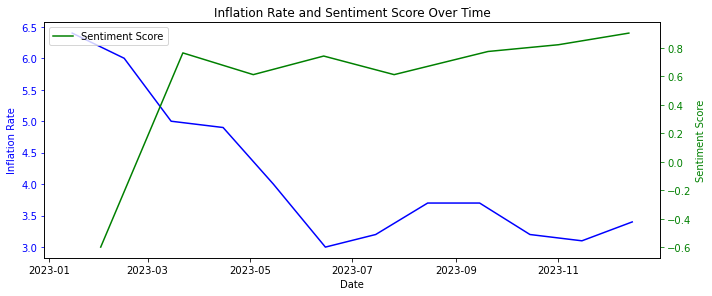

In [207]:
# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot the Inflation Rate on the first y-axis
ax1.plot(df_us_inf_transposed.head(12)['Date'], df_us_inf_transposed.head(12)['InflationRate'].astype(float), color='blue', label='Inflation Rate')
ax1.set_xlabel('Date')
ax1.set_ylabel('Inflation Rate', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis for Sentiment Score
ax2 = ax1.twinx()
ax2.plot(df_fomc_press_statements['Date_format'], df_fomc_press_statements['compound'].astype(float), color='green', label='Sentiment Score')
ax2.set_ylabel('Sentiment Score', color='green')
ax2.tick_params('y', colors='green')

# Display the legend
fig.tight_layout()
plt.legend(loc='upper left')
plt.title('Inflation Rate and Sentiment Score for 2023')

# Show the plot
plt.show()

### Helper Functions

In [223]:
def line( df,sort=True,figsize=(8, 5),ax=None,title="",cumsum=False,loc="center left",bbox_to_anchor=(1, 0.5),legend_sharpe_ratio=None,legend=True,yscale=None,start_date=None,
          ):
    df = df.copy()
    if loc == "best":
        bbox_to_anchor = None
    if isinstance(df, dict) | isinstance(df, list):
        df = pd.concat(df, axis=1)
    if isinstance(df, pd.Series):
        df = df.to_frame()
    if start_date is not None:
        df = df[start_date:]
    if cumsum & (legend_sharpe_ratio is None):
        legend_sharpe_ratio = True
    if legend_sharpe_ratio:
        df.columns = [f"{c}: sr={sharpe_ratio(df[c]): 3.2f}" for c in df.columns]
    if cumsum:
        df = df.cumsum()
    if sort:
        df = df.loc[:, lambda x: x.iloc[-1].sort_values(ascending=False).index]
    fig, ax = set_axis(ax=ax, figsize=figsize, title=title)
    ax.plot(df.index, df.values)
    if legend:
        ax.legend(df.columns, loc=loc, bbox_to_anchor=bbox_to_anchor)
    if yscale == "log":
        ax.set_yscale("log")